In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
# Define the Lorentzian function
def lorentzian(x, x0, gamma, A):
    return A * (1/np.pi) * (gamma / ((x - x0)**2 + gamma**2))

In [2]:
def FWHM_calculator(xdf,s,e):
    df = pd.read_csv(xdf)
    df['Channels'] = df.index + 1
    df = df.iloc[s:e]
    plt.figure(figsize=(10,5))
    plt.plot(df['Channels'],df['Count'],label="Observed")
    # ic = [max(df['Count']), df['Channels'].mean(), df['Channels'].std()]
    i = [max(df['Count']), 100,12000]
    params, covt = curve_fit(lorentzian,df['Channels'],df['Count'], p0=i)
    preds = lorentzian(df['Channels'],params[0],params[1], params[2])
    print(f"x0:{params[0]}, gamma:{params[1]}, A:{params[2]}, Max:{max(preds)}, Resolution:{(params[1]*100/params[0])}%")
    plt.plot(df['Channels'],preds,label="Fitted")
    plt.title(f"Energy Spectrum for {xdf[:-4]}")
    plt.axvline(x=params[0], color='red')
    plt.xlabel("Channels")
    plt.ylabel("Count")
    plt.legend()
    plt.savefig(f"{xdf[:-4]}.png")

x0:239.42419906504006, gamma:37.88505063981623, A:1468486.8004596382, Max:12336.667425033296, Resolution:15.823400803995037%


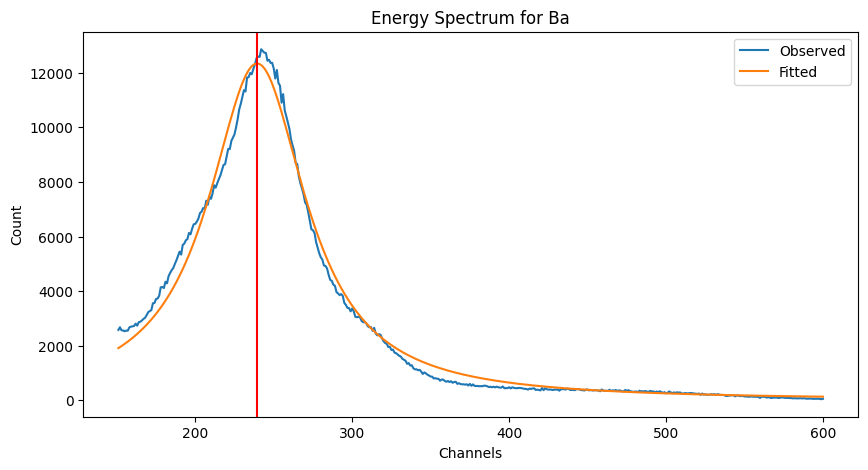

In [3]:
FWHM_calculator('Ba.txt',150,600)

x0:104.0962004255733, gamma:6.14032593269878, A:19553.1228120264, Max:1013.3704696354181, Resolution:5.898703226050014%


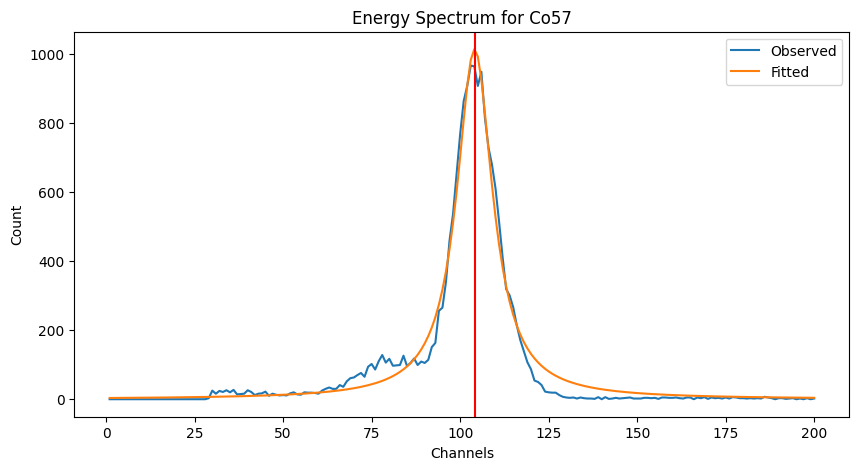

In [4]:
FWHM_calculator('Co57.txt',0,200)

x0:811.3151936817436, gamma:56.794767006656265, A:279852.3445468821, Max:1568.4019697842768, Resolution:7.000333218082845%


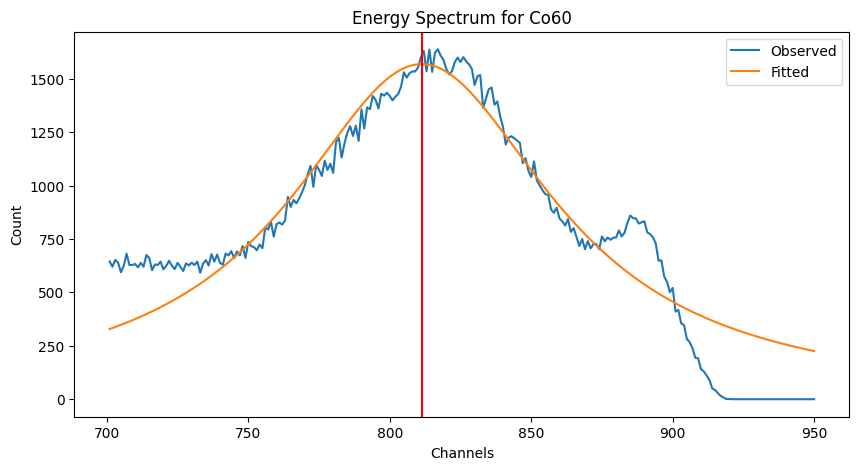

In [5]:
FWHM_calculator('Co60.txt',700,950)

x0:443.5719040684269, gamma:24.54092392398179, A:772120.5251932665, Max:10011.800345071711, Resolution:5.532569511029271%


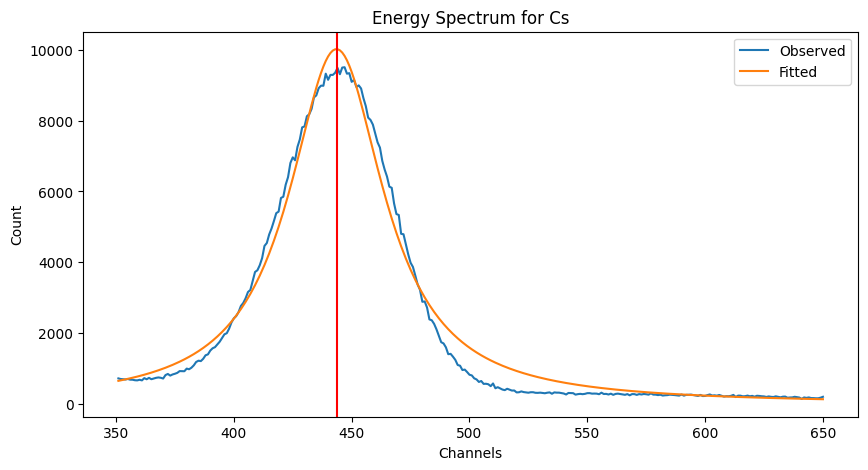

In [6]:
FWHM_calculator('Cs.txt',350,650)

x0:338.35549821256274, gamma:26.384509748444653, A:616482.2749980484, Max:7436.05951863171, Resolution:7.797866412050823%


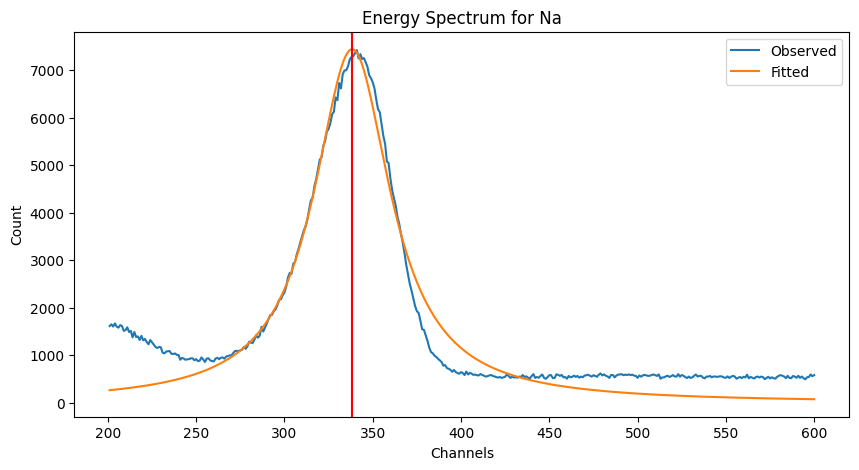

In [7]:
FWHM_calculator('Na.txt',200,600)

In [1]:
Peack_channels= [0.122,
 0.356,
 338.35549821256274,
 443.5719040684269,
 811.3151936817436]

Resolutions = [5.898703226050014,
               15.823400803995037,
               7.797866412050823,
                5.532569511029271,
                7.000333218082845,]

In [9]:
# Element = ['Co57','Ba','Na','Cs','Co60']
# Peack_channels = [0.122, 0.356,0.511,0.667,1.170] #Energy
# Resolutions = [5.89, 15.89, 7.79, 5.53, 7.70]

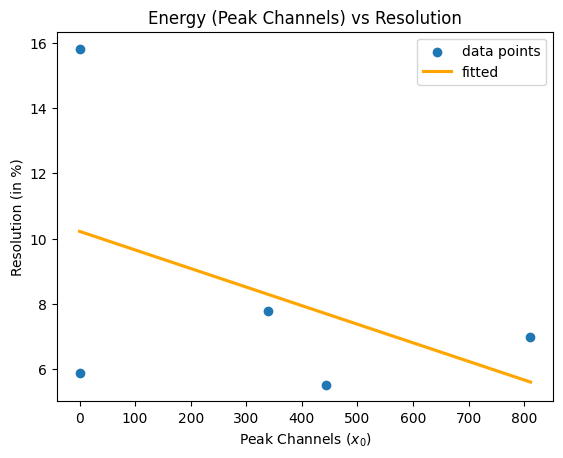

In [10]:
plt.scatter(x=Peack_channels, y=Resolutions, label='data points')
sns.regplot(x=Peack_channels, y=Resolutions, ci=0, scatter=0, color='orange', label='fitted')
plt.xlabel(f"Peak Channels ($x_0$)")
plt.ylabel("Resolution (in %)")
plt.title("Energy (Peak Channels) vs Resolution")
plt.legend()
plt.savefig('ResVSEng.png');

In [2]:
# Mean Resolution
np.mean(Resolutions)

8.410574634241598